# Importing Needed Libraries

In [2]:
pip install scikit-surprise


Note: you may need to restart the kernel to use updated packages.


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity
import operator


# First data : BigBasket Entire Product List (~28K datapoints)

## Importing Data

In [4]:
data1=pd.read_csv('/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv')

## Getting Famalliar with data

In [5]:
data1

index                                            product  \
0          1             Garlic Oil - Vegetarian Capsule 500 mg   
1          2                              Water Bottle - Orange   
2          3                     Brass Angle Deep - Plain, No.2   
3          4  Cereal Flip Lid Container/Storage Jar - Assort...   
4          5                 Creme Soft Soap - For Hands & Body   
...      ...                                                ...   
27550  27551         Wottagirl! Perfume Spray - Heaven, Classic   
27551  27552                                           Rosemary   
27552  27553                       Peri-Peri Sweet Potato Chips   
27553  27554                          Green Tea - Pure Original   
27554  27555                     United Dreams Go Far Deodorant   

                     category              sub_category  \
0            Beauty & Hygiene                 Hair Care   
1      Kitchen, Garden & Pets     Storage & Accessories   
2        Cleaning & Household               Pooja Needs   
3        Cleaning & Household      Bins & Bathroom Ware   
4            Beauty & Hygiene          Bath & Hand Wash   
...                       ...                       ...   
27550        Beauty & Hygiene         Fragrances & Deos   
27551    Gourmet & World Food    Cooking & Baking Needs   
27552    Gourmet & World Food  Snacks, Dry Fruits, Nuts   
27553               Beverages                       Tea   
27554        Beauty & Hygiene            Men's Grooming   

                            brand  sale_price  market_price  \
0               Sri Sri Ayurveda       220.00         220.0   
1                      Mastercook      180.00         180.0   
2                             Trm      119.00         250.0   
3                          Nakoda      149.00         176.0   
4                           Nivea      162.00         162.0   
...                           ...         ...           ...   
27550                      Layerr      199.20         249.0   
27551                    Puramate       67.50          75.0   
27552                      FabBox      200.00         200.0   
27553                      Tetley      396.00         495.0   
27554  United Colors Of Benetton       214.53         390.0   

                           type  rating  \
0              Hair Oil & Serum     4.1   
1        Water & Fridge Bottles     2.3   
2               Lamp & Lamp Oil     3.4   
3      Laundry, Storage Baskets     3.7   
4          Bathing Bars & Soaps     4.4   
...                         ...     ...   
27550                   Perfume     3.9   
27551  Herbs, Seasonings & Rubs     4.0   
27552            Nachos & Chips     3.8   
27553                  Tea Bags     4.2   
27554          Men's Deodorants     4.5   

                                             description  
0      This Product contains Garlic Oil that is known...  
1      Each product is microwave safe (without lid), ...  
2      A perfect gift for all occasions, be it your m...  
3      Multipurpose container with an attractive desi...  
4      Nivea Creme Soft Soap gives your skin the best...  
...                                                  ...  
27550  Layerr brings you Wottagirl Classic fragrant b...  
27551  Puramate rosemary is enough to transform a dis...  
27552  We have taken the richness of Sweet Potatoes (...  
27553  Tetley Green Tea with its refreshing pure, ori...  
27554  The new mens fragrance from the United Dreams ...  

[27555 rows x 10 columns]

In [6]:
data1.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [7]:
data1.describe()

index    sale_price  market_price        rating
count  27555.00000  27555.000000  27555.000000  18929.000000
mean   13778.00000    322.514808    382.056664      3.943410
std     7954.58767    486.263116    581.730717      0.739063
min        1.00000      2.450000      3.000000      1.000000
25%     6889.50000     95.000000    100.000000      3.700000
50%    13778.00000    190.000000    220.000000      4.100000
75%    20666.50000    359.000000    425.000000      4.300000
max    27555.00000  12500.000000  12500.000000      5.000000

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [9]:
data1.category.unique()

array(['Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Fruits & Vegetables',
       'Eggs, Meat & Fish'], dtype=object)

In [10]:
data1.brand.value_counts().head(30)

brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
bb Combo            168
Amul                153
INATUR              146
Himalaya            141
Dabur               138
GoodDiet            134
Nike                124
Cello               124
Iveo                118
BIOTIQUE            117
Aroma Magic         109
Colgate             107
Organic Tattva      106
Loreal Paris        104
Britannia           104
Nakoda              103
Soulflower          102
Keya                101
NUTRIWISH           101
MTR                 100
True Elements        99
Mamaearth            97
Graminway            96
HappyChef            96
Dettol               95
Name: count, dtype: int64

### To Check Null Values

In [11]:
data1.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

<Axes: >

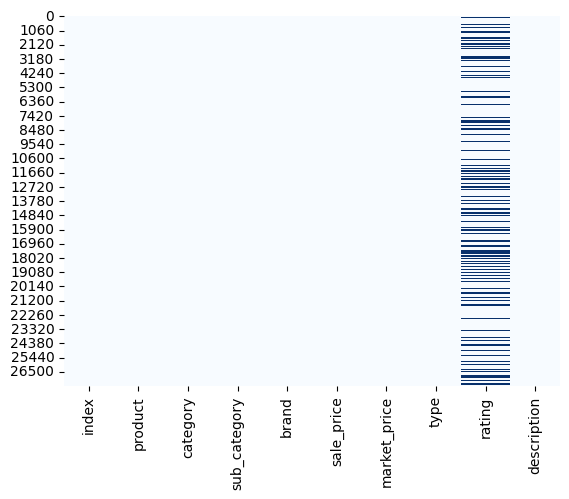

In [12]:
sns.heatmap(data1.isnull(),cmap='Blues',cbar=False)

### To Check Caegorical And Numerical Features

In [13]:
categorical_features_d1 = data1.select_dtypes(include=['object']).columns.tolist()
numerical_features_d1 = data1.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Features:", categorical_features_d1)
print("Numerical Features:", numerical_features_d1)


Categorical Features: ['product', 'category', 'sub_category', 'brand', 'type', 'description']
Numerical Features: ['index', 'sale_price', 'market_price', 'rating']


## To Handle Null-Values

In [14]:
data1['rating'].fillna(data1['rating'].mean(), inplace=True)

data1.dropna(subset=['product', 'brand', 'description'], inplace=True)

In [15]:
data1.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

## To Handle Duplicate Data

In [16]:
data1.duplicated().sum()

0

## EDA 

### Top & least sold products

In [17]:
top = data1["product"].value_counts().head(15)
least=data1["product"].value_counts().tail(15)

In [18]:
print('Most Sold products:')
top

Most Sold products:


product
Turmeric Powder/Arisina Pudi          26
Extra Virgin Olive Oil                15
Cow Ghee/Tuppa                        13
Colorsilk Hair Colour With Keratin    12
Soft Drink                            12
Olive Oil - Extra Virgin              12
Ghee/Tuppa                            11
Coriander Powder                      11
Casting Creme Gloss Hair Color        10
Powder - Coriander                    10
Hand Sanitizer                        10
Peanut Butter - Creamy                10
Masala - Chicken                       9
Anti Dandruff Shampoo                  9
Chia Seeds                             9
Name: count, dtype: int64

In [19]:
print('Least Sold products:')
least

Least Sold products:


product
Mixture - Bajra Puffs Masala                                     1
Pepper & Herb Salami Chicken                                     1
Nutmeg Powder                                                    1
Disney Mickey Mouse Plastic Kids Sipper Bottle - Coolest Dude    1
Chocolates-Roasted Peanut Chocolate                              1
Lavangadi Vati - Respiratory Conditions, 300mg                   1
100% Melamine Quadra Chutney Bowl - Black, Green & Yellow        1
Pomegranate - Small                                              1
Butter - Cashew, Smooth                                          1
Panty Liners - Herbs Verbena                                     1
Jamun Vati                                                       1
Drops - Milk Chocolate                                           1
Cooling Mint Body Wash                                           1
Snacks - Cheese Balls, Cheese Flavoured                          1
Green Tea - Pure Original                             

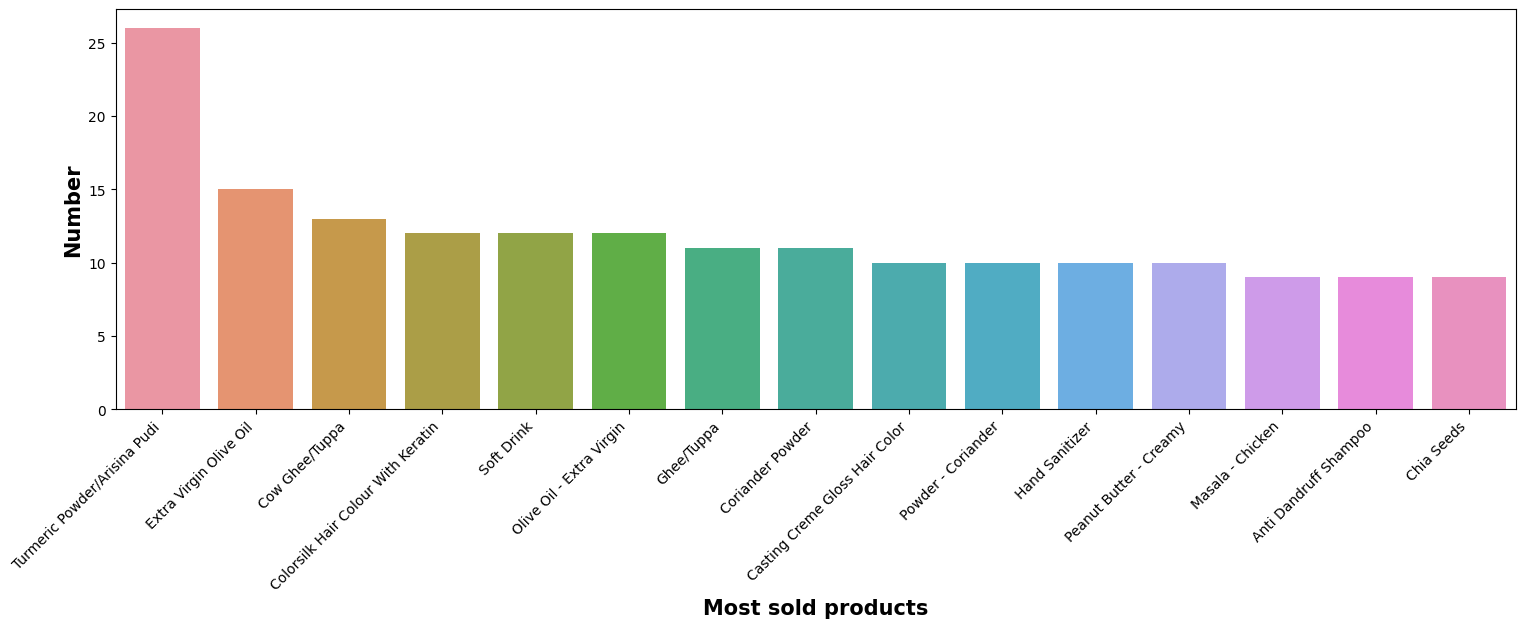

In [20]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(x=top.index, y=top.values, data=data1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_xlabel("Most sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')

plt.show()

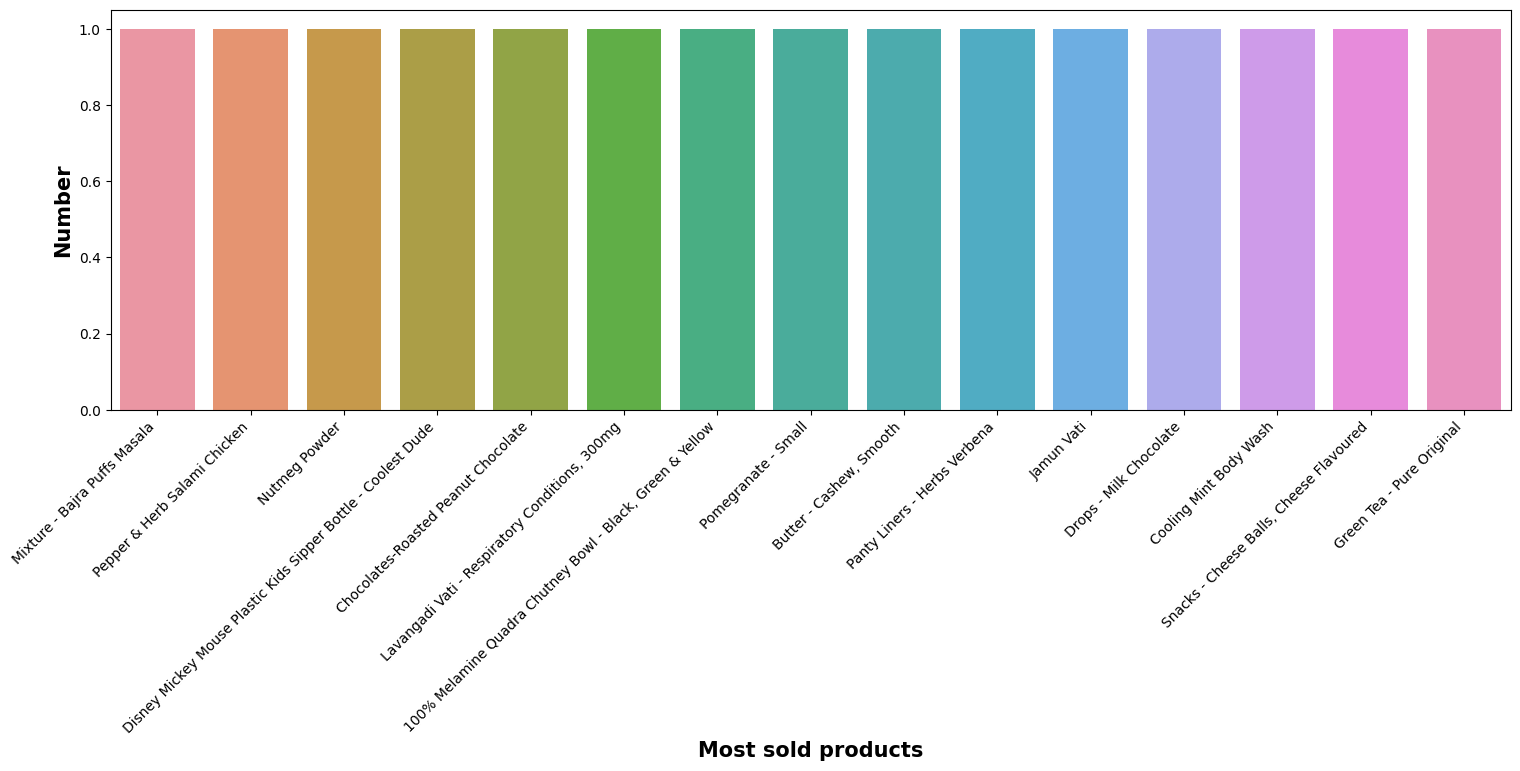

In [21]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(x=least.index, y=least.values, data=data1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_xlabel("Most sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')

plt.show()

Through the plots of most and least sold products, we get to know that

Indians have a trend to purchase different types of oils and ghee.
Turmeric and coriander are the most used spices in indian cuisine. On the other hand, Nutmeg and pepper powder are used in scarce amounts.
Hand santizer is one of the highest sold products most probably due to covid-19 pandemic.
Indians are very keen about haircare as we see hair color, shampoo and oils in the highest selling products.
Raw spices like turmeric are preferred on masala mixtures.

### Top and least sold Categories

In [22]:
len(data1["category"].unique())

11

In [23]:
topCategories = data1["category"].value_counts()[:12]


In [24]:
topCategories

category
Beauty & Hygiene            7856
Gourmet & World Food        4647
Kitchen, Garden & Pets      3562
Snacks & Branded Foods      2813
Cleaning & Household        2665
Foodgrains, Oil & Masala    2655
Beverages                    881
Bakery, Cakes & Dairy        851
Baby Care                    609
Fruits & Vegetables          556
Eggs, Meat & Fish            344
Name: count, dtype: int64

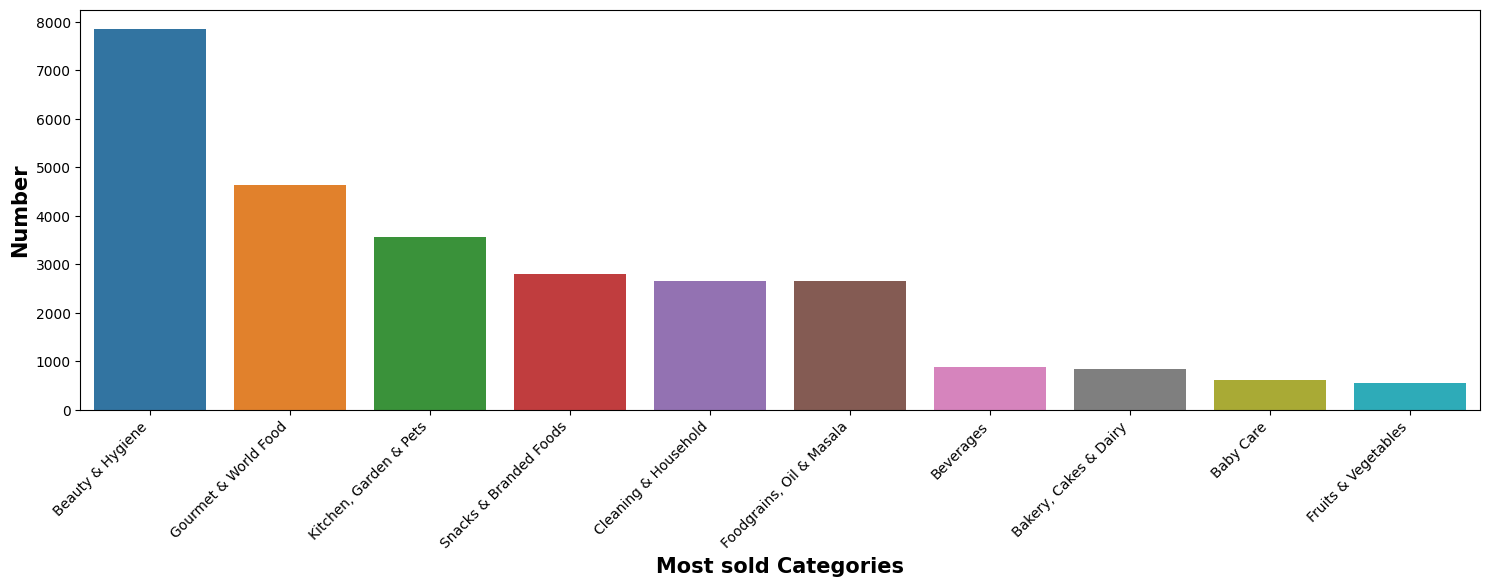

In [25]:
fig = plt.figure(figsize=(14,4))
ax2 = fig.add_axes([0,0,1,1])

sns.barplot(x=data1["category"].value_counts()[:10].index, y=data1["category"].value_counts()[:10].values,
            data=data1, linewidth=0,
            alpha=1.0)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

ax2.set_xlabel("Most sold Categories",fontsize=15, weight='semibold')
ax2.set_ylabel("Number",fontsize=15, weight='semibold')

plt.show()

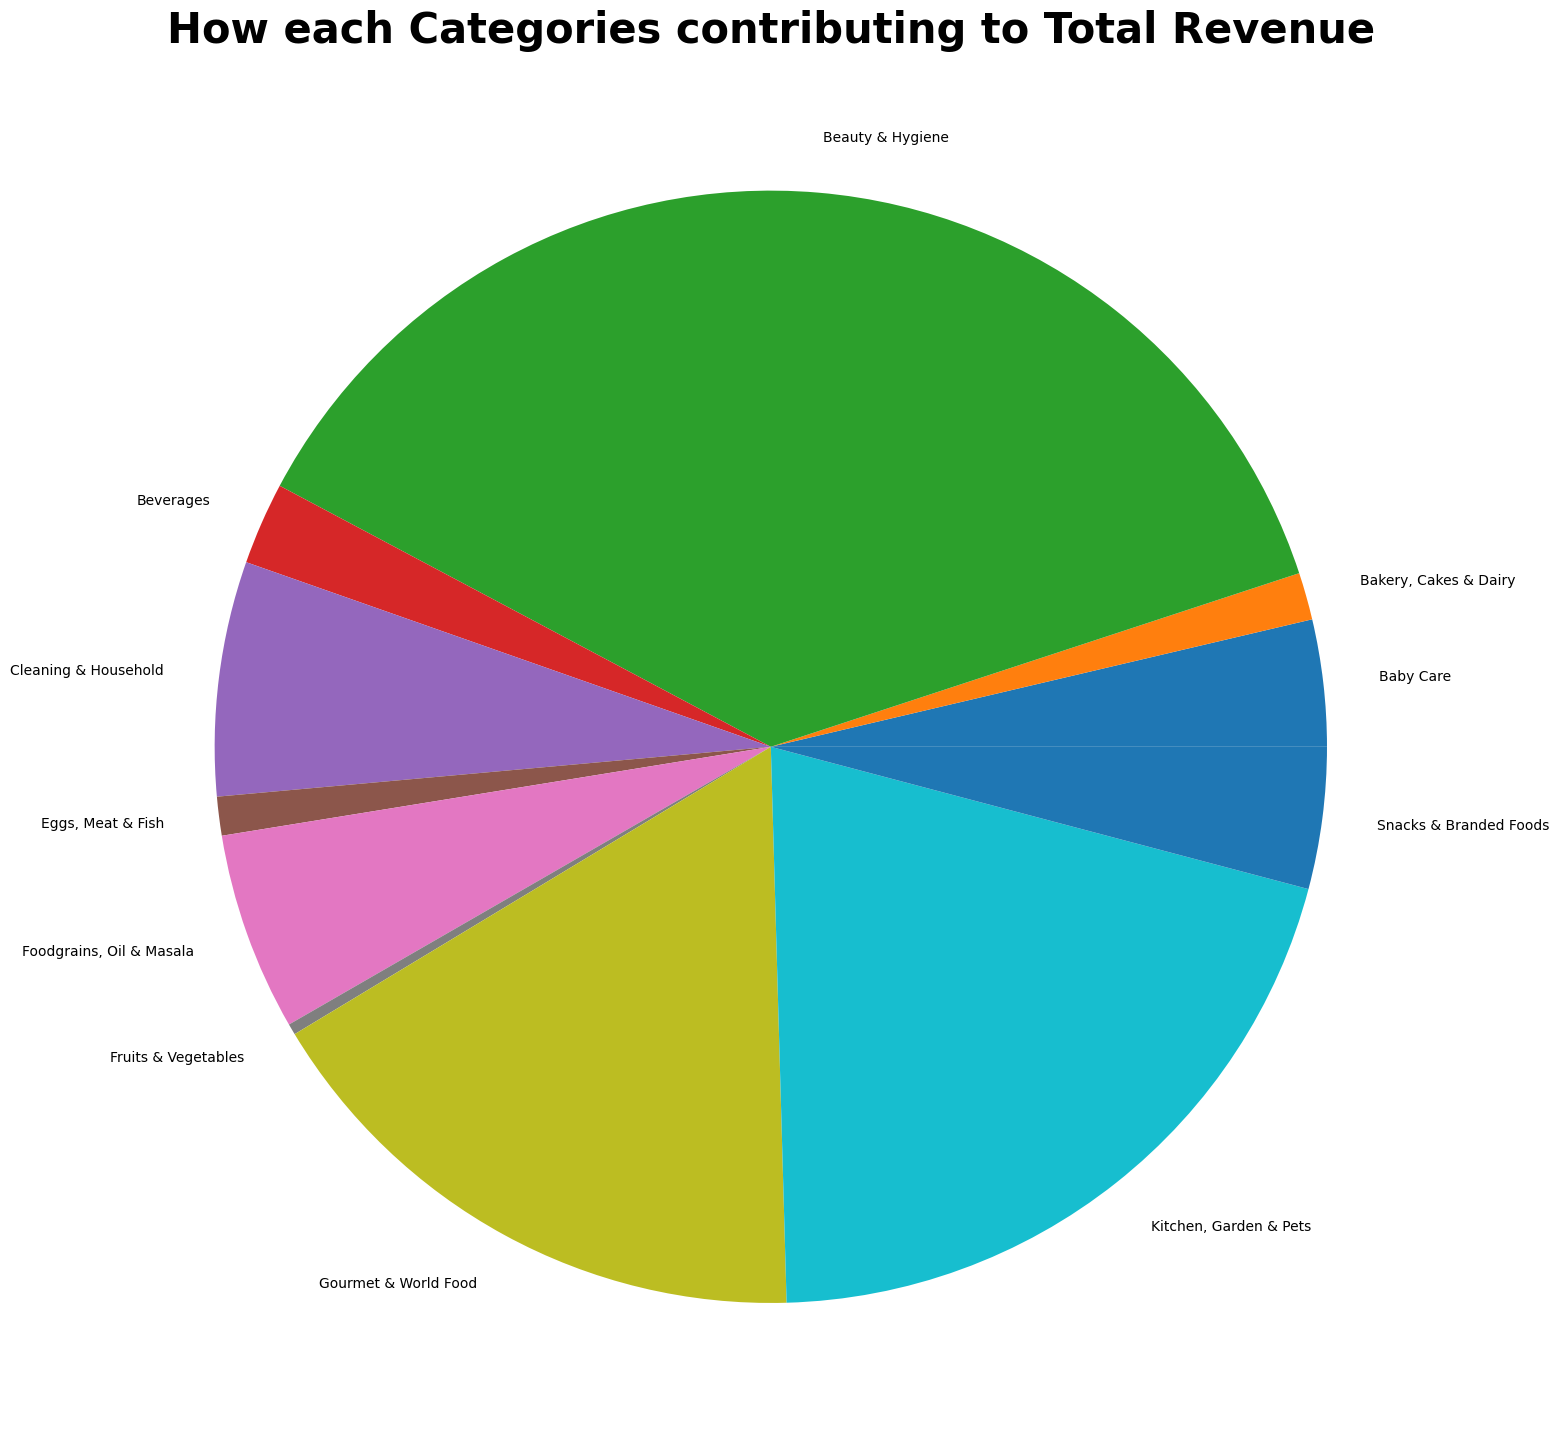

In [26]:
data = data1.sale_price.groupby(data1.category).sum()
plt.figure(figsize=(16,16))
plt.pie(x=data,labels=data.index)
plt.title('How each Categories contributing to Total Revenue',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 16
plt.tight_layout()

### Top sold Brands

In [27]:
counts = data1['brand'].value_counts()
counts_df_brand = pd.DataFrame({'Brand Name':counts.index,'Counts':counts.values})[:10]

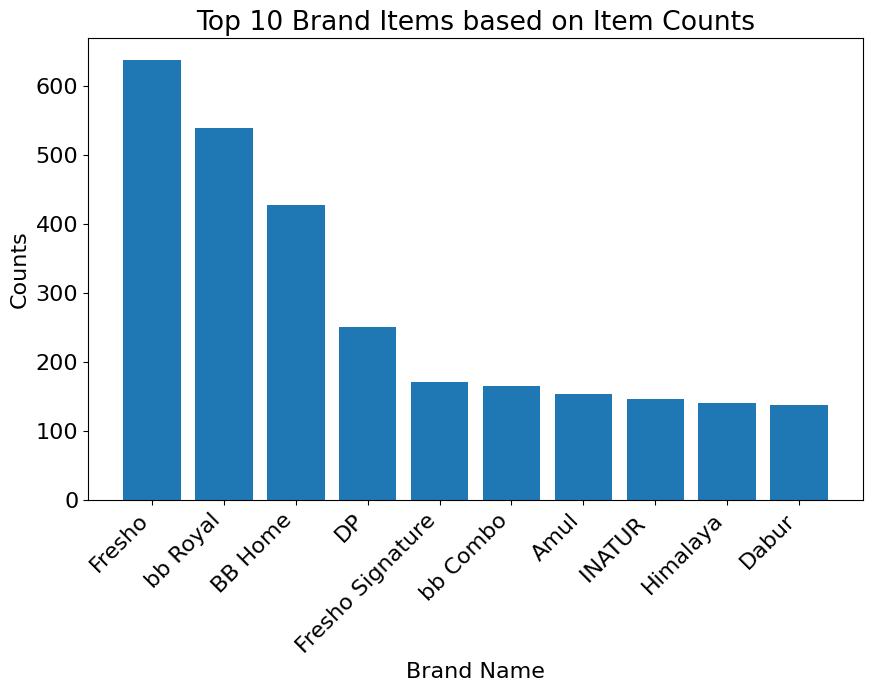

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(counts_df_brand['Brand Name'], counts_df_brand['Counts'])
plt.xlabel('Brand Name')
plt.ylabel('Counts')
plt.title('Top 10 Brand Items based on Item Counts')
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for better visibility
plt.show()


### Avarge Rate, Market Price &  Sale Price In Each Category

In [29]:
avg_df = data1[['category', 'rating', 'market_price', 'sale_price']].groupby(['category']).mean().reset_index().sort_values('rating', ascending=False)

In [30]:
px.scatter(avg_df, x='category', y='rating', color='rating', title='Avarge Rate In Each Category')

In [31]:
px.scatter(avg_df, x='category', y='market_price', color='market_price', title='Avarge Market Price In Each Category')

In [32]:
px.scatter(avg_df, x='category', y='sale_price', color='sale_price', title='Avarge Sale Price In Each Category')

### Effect of discounted prices

Lets check which items can be bought at discounted price from Big basket. For this, we will add another feature "diff_in_prices" measuring discount on a certain item.

In [33]:
data1["diff_in_prices"] = data1["market_price"] - data1["sale_price"]
discount = data1[data1["diff_in_prices"] != 0]
discount

index                                            product  \
2          3                     Brass Angle Deep - Plain, No.2   
3          4  Cereal Flip Lid Container/Storage Jar - Assort...   
5          6                  Germ - Removal Multipurpose Wipes   
10        11                           Wheat Grass Powder - Raw   
15        16           Dove Plastic Soap Case - Assorted Colour   
...      ...                                                ...   
27546  27547                      Organic Powder - Garam Masala   
27550  27551         Wottagirl! Perfume Spray - Heaven, Classic   
27551  27552                                           Rosemary   
27553  27554                          Green Tea - Pure Original   
27554  27555                     United Dreams Go Far Deodorant   

                       category            sub_category  \
2          Cleaning & Household             Pooja Needs   
3          Cleaning & Household    Bins & Bathroom Ware   
5          Cleaning & Household    All Purpose Cleaners   
10         Gourmet & World Food  Cooking & Baking Needs   
15         Cleaning & Household    Bins & Bathroom Ware   
...                         ...                     ...   
27546  Foodgrains, Oil & Masala         Organic Staples   
27550          Beauty & Hygiene       Fragrances & Deos   
27551      Gourmet & World Food  Cooking & Baking Needs   
27553                 Beverages                     Tea   
27554          Beauty & Hygiene          Men's Grooming   

                            brand  sale_price  market_price  \
2                             Trm      119.00         250.0   
3                          Nakoda      149.00         176.0   
5                  Nature Protect      169.00         199.0   
10                      NUTRASHIL      261.00         290.0   
15                         Nakoda       49.00          59.0   
...                           ...         ...           ...   
27546              Organic Tattva      152.00         160.0   
27550                      Layerr      199.20         249.0   
27551                    Puramate       67.50          75.0   
27553                      Tetley      396.00         495.0   
27554  United Colors Of Benetton       214.53         390.0   

                                type  rating  \
2                    Lamp & Lamp Oil     3.4   
3           Laundry, Storage Baskets     3.7   
5      Disinfectant Spray & Cleaners     3.3   
10                Flours & Pre-Mixes     4.0   
15           Soap Cases & Dispensers     4.0   
...                              ...     ...   
27546       Organic Masalas & Spices     4.2   
27550                        Perfume     3.9   
27551       Herbs, Seasonings & Rubs     4.0   
27553                       Tea Bags     4.2   
27554               Men's Deodorants     4.5   

                                             description  diff_in_prices  
2      A perfect gift for all occasions, be it your m...          131.00  
3      Multipurpose container with an attractive desi...           27.00  
5      Stay protected from contamination with Multipu...           30.00  
10     Wheatgrass is a superfood potent health food w...           29.00  
15     This soap case is made of virgin plastic which...           10.00  
...                                                  ...             ...  
27546  Organic Tattva Garam masala is a famous spice ...            8.00  
27550  Layerr brings you Wottagirl Classic fragrant b...           49.80  
27551  Puramate rosemary is enough to transform a dis...            7.50  
27553  Tetley Green Tea with its refreshing pure, ori...           99.00  
27554  The new mens fragrance from the United Dreams ...          175.47  

[15175 rows x 11 columns]

/tmp/ipykernel_42/1852509121.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_42/1852509121.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




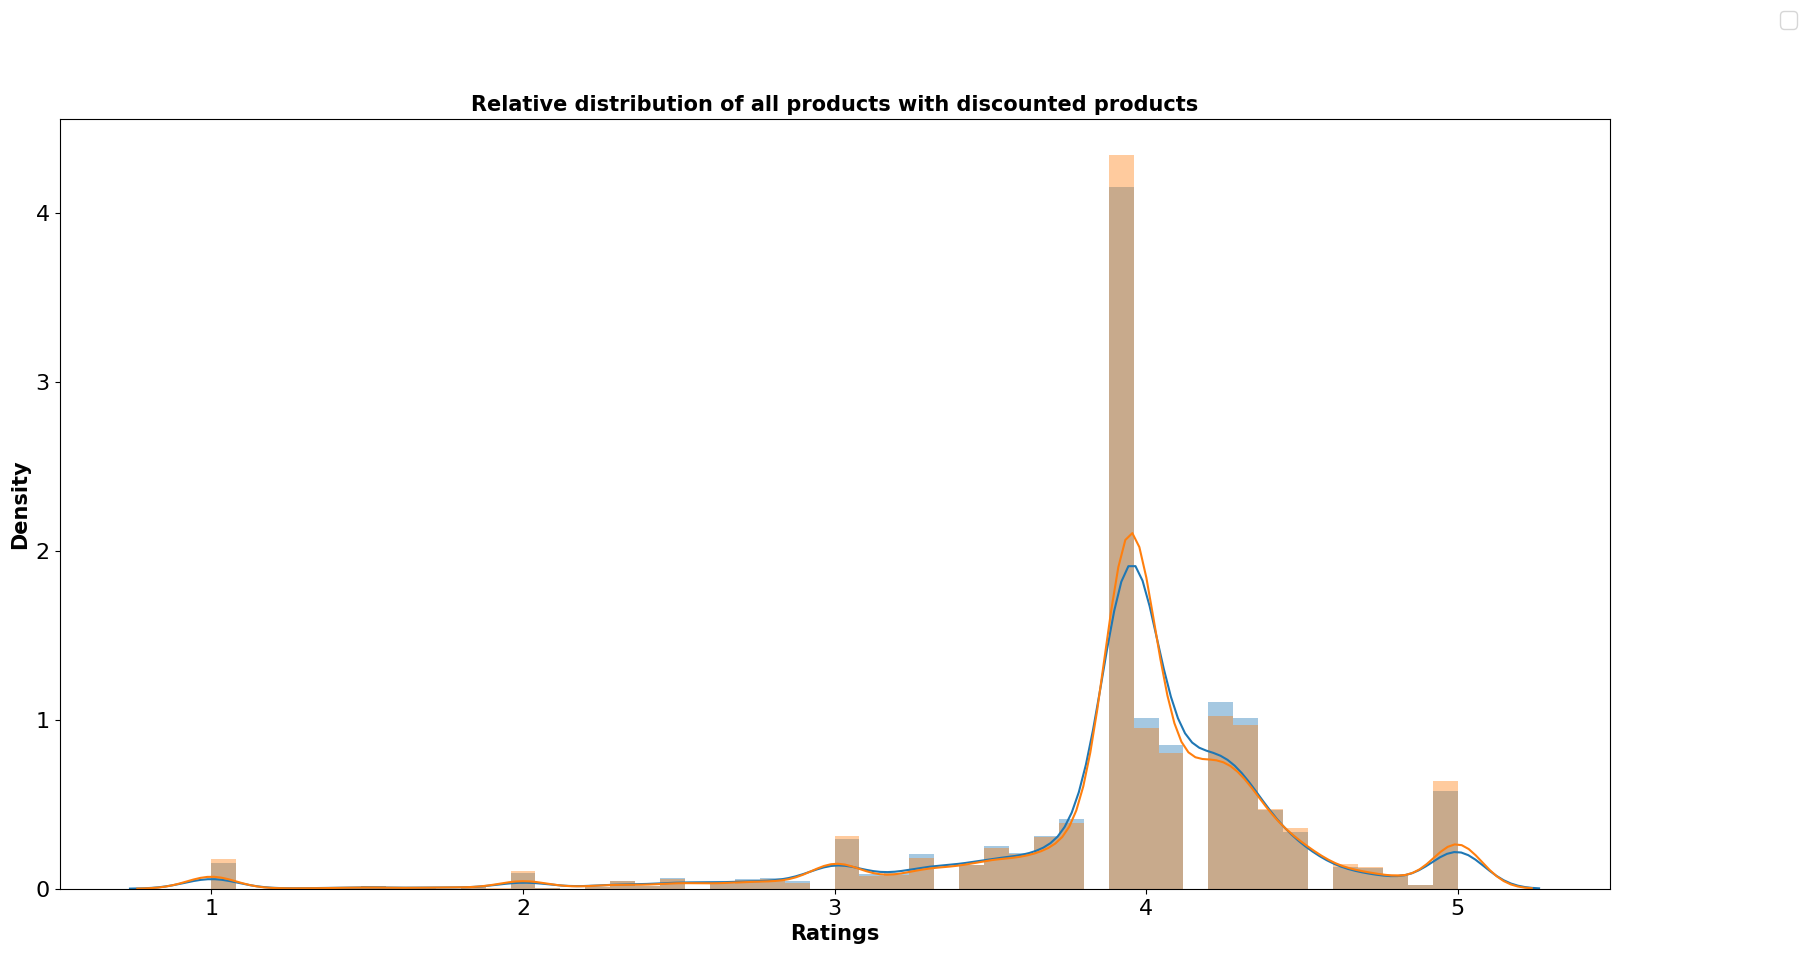

In [34]:
fig = plt.figure(figsize=(20,10))

sns.distplot(discount.rating, kde =True)
sns.distplot(data1.rating, kde =True)
plt.xlabel("Ratings",fontsize=15, weight='semibold')
plt.ylabel("Density",fontsize=15, weight='semibold')
plt.title("Relative distribution of all products with discounted products",fontsize=15, weight='semibold')
fig.legend()

In the above graph, yellow color specifies rating of all the items, whereas blue color denotes the ratings of the items on which some discount has been offered. As we see,

the offered discounts showed a little increase in purchase of items with 3.0 to 4.2 ratings. Otherwise, discounts helped no increase in purchase. Another interesting observation was that the highest rated products (4.5 to 5) with no discount exceeded the rate of purchase of discounted products. It means the customers if provided with high quality products which satisfy them, will buy the products no matter discount is offered or not.

In [35]:
A=data1['market_price']
B=data1['sale_price']

data1['discount%']= 100*(A-B)/A
data1['discount']= A-B

<Axes: title={'center': 'market price vs discount'}, xlabel='market_price', ylabel='discount'>

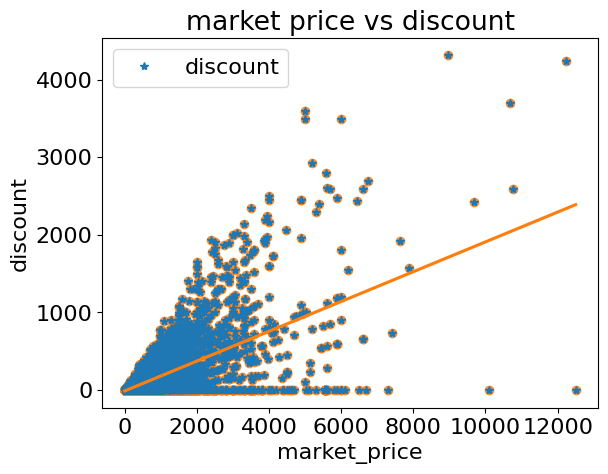

In [36]:
data1.plot(x='market_price', y='discount', style='*')
plt.title('market price vs discount')
plt.xlabel('market price')
plt.ylabel('discount')
sns.regplot(x='market_price', y='discount', ci = None, data = data1)

In the above charts we try to compare the relationship between the market price with the discount price and discount percentage. From above charts we notice that the items with higher market price have higher discount price, However, if we see it in terms of percentage, the items with lower market price have higher discount percentage.

In [37]:
# Grouping products by Category and sort by discount percentage
avg_category = data1[
            ['category','rating', 'market_price', 'sale_price','discount','discount%']
        ].groupby(['category']).mean().reset_index().sort_values('discount%', ascending = False)
avg_category

category    rating  market_price  sale_price    discount  \
9     Kitchen, Garden & Pets  3.796733    660.226109  507.862527  152.363582   
7        Fruits & Vegetables  3.943410     64.452878   50.903525   13.549353   
2           Beauty & Hygiene  3.934446    493.869045  418.972981   74.896064   
6   Foodgrains, Oil & Masala  4.040875    228.180414  192.250844   35.929571   
4       Cleaning & Household  3.953402    262.454165  226.431741   36.022424   
3                  Beverages  4.044150    272.754824  240.177832   32.576992   
5          Eggs, Meat & Fish  3.943410    327.594244  290.208198   37.386047   
8       Gourmet & World Food  3.964021    359.081332  320.308283   38.773049   
1      Bakery, Cakes & Dairy  3.918184    157.881316  142.802750   15.078566   
10    Snacks & Branded Foods  3.978342    140.807501  129.621429   11.186072   
0                  Baby Care  4.008454    596.880131  535.169409   61.710722   

    discount%  
9   22.197190  
7   21.251992  
2   12.342890  
6   11.857631  
4   10.796686  
3    9.591935  
5    8.111041  
8    7.874205  
1    7.664125  
10   6.645312  
0    5.824085

## Correlations

#### Checking for correlation between market price and discount


In [38]:
print('Coefficient of Correlation')
stats.pearsonr(data1['market_price'],data1['discount'])

Coefficient of Correlation


PearsonRResult(statistic=0.6611903567911539, pvalue=0.0)

In [39]:
X = data1['market_price']
Y= data1['discount']

correlation_matrix = np.corrcoef(X, Y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(f'coefficient of determination = {r_squared:.3f}')

coefficient of determination = 0.437


#### Relationship between rating and discount %


In [40]:
data = px.data.iris()
fig = px.scatter(data1, x='discount%', y='rating', color='rating', height=600)
fig.show()

#### Relationship between rating and Market price


In [41]:
data = px.data.iris()
fig = px.scatter(data1, x='market_price', y='rating', color='rating', height=600)
fig.show()

## high rated products (more than 4 score)

In [42]:
highrated = data1.query('rating > 4', inplace=False)
print("Number of products with more than 4 rating is",highrated.shape[0])

Number of products with more than 4 rating is 10212


In [43]:
highrated.head()


index                                     product              category  \
0       1      Garlic Oil - Vegetarian Capsule 500 mg      Beauty & Hygiene   
4       5          Creme Soft Soap - For Hands & Body      Beauty & Hygiene   
9      10        Scrub Pad - Anti- Bacterial, Regular  Cleaning & Household   
12     13             Face Wash - Oil Control, Active      Beauty & Hygiene   
14     15  Just Spray - Mosquito Repellent Room Spray  Cleaning & Household   

               sub_category              brand  sale_price  market_price  \
0                 Hair Care  Sri Sri Ayurveda        220.0         220.0   
4          Bath & Hand Wash              Nivea       162.0         162.0   
9    Mops, Brushes & Scrubs       Scotch brite        20.0          20.0   
12                Skin Care                Oxy       110.0         110.0   
14  Fresheners & Repellents    Herbal Strategi       200.0         200.0   

                        type  rating  \
0           Hair Oil & Serum     4.1   
4       Bathing Bars & Soaps     4.4   
9   Utensil Scrub-Pad, Glove     4.3   
12                 Face Care     5.0   
14        Mosquito Repellent     4.2   

                                          description  diff_in_prices  \
0   This Product contains Garlic Oil that is known...             0.0   
4   Nivea Creme Soft Soap gives your skin the best...             0.0   
9   Scotch Brite Anti- Bacterial Scrub Pad thoroug...             0.0   
12  This face wash deeply cleanses dirt and impuri...             0.0   
14  Strategi Just Spray is a very effective 100% H...             0.0   

    discount%  discount  
0         0.0       0.0  
4         0.0       0.0  
9         0.0       0.0  
12        0.0       0.0  
14        0.0       0.0

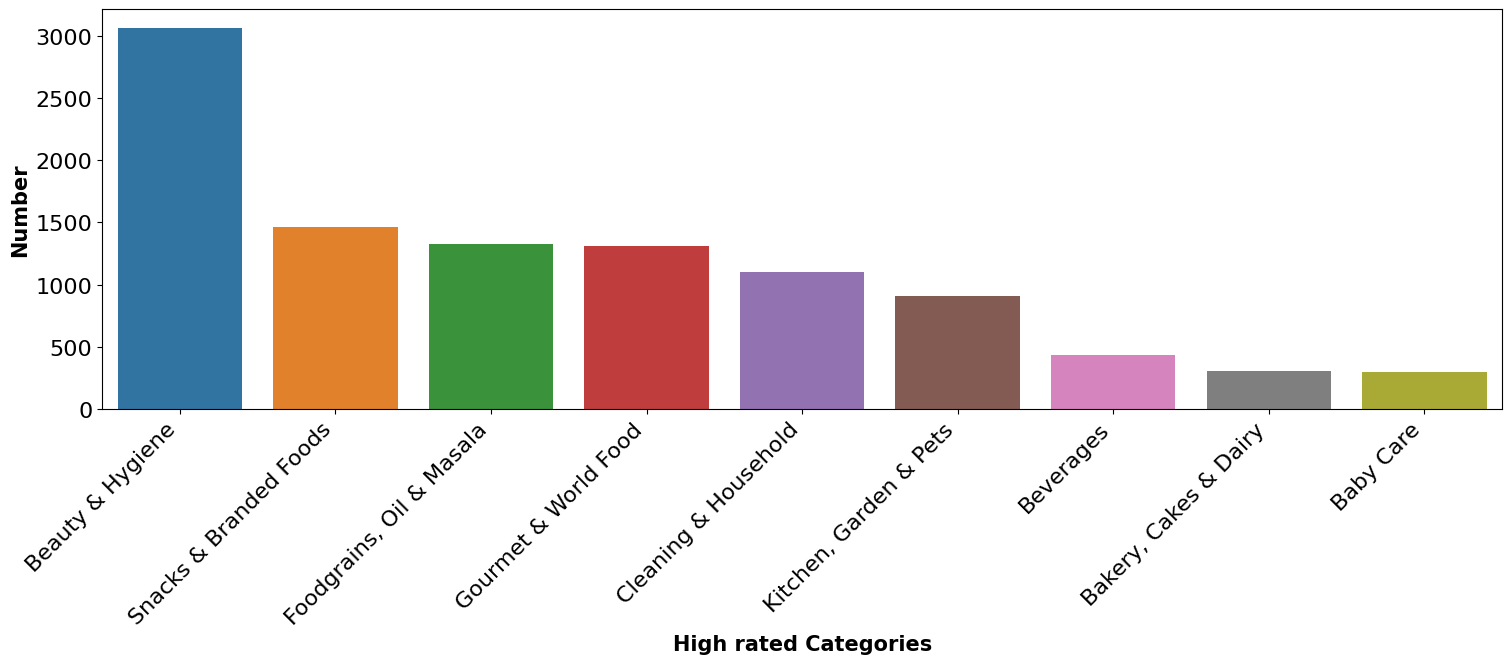

In [44]:
fig = plt.figure(figsize=(14, 4))
ax3 = fig.add_axes([0, 0, 1, 1])

sns.barplot(x=highrated["category"].value_counts()[:10].index, 
            y=highrated["category"].value_counts()[:10].values,
            data=highrated, linewidth=0, alpha=1.0)

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

ax3.set_xlabel("High rated Categories", fontsize=15, weight='semibold')
ax3.set_ylabel("Number", fontsize=15, weight='semibold')

plt.show()

/tmp/ipykernel_42/1312495411.py:2: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



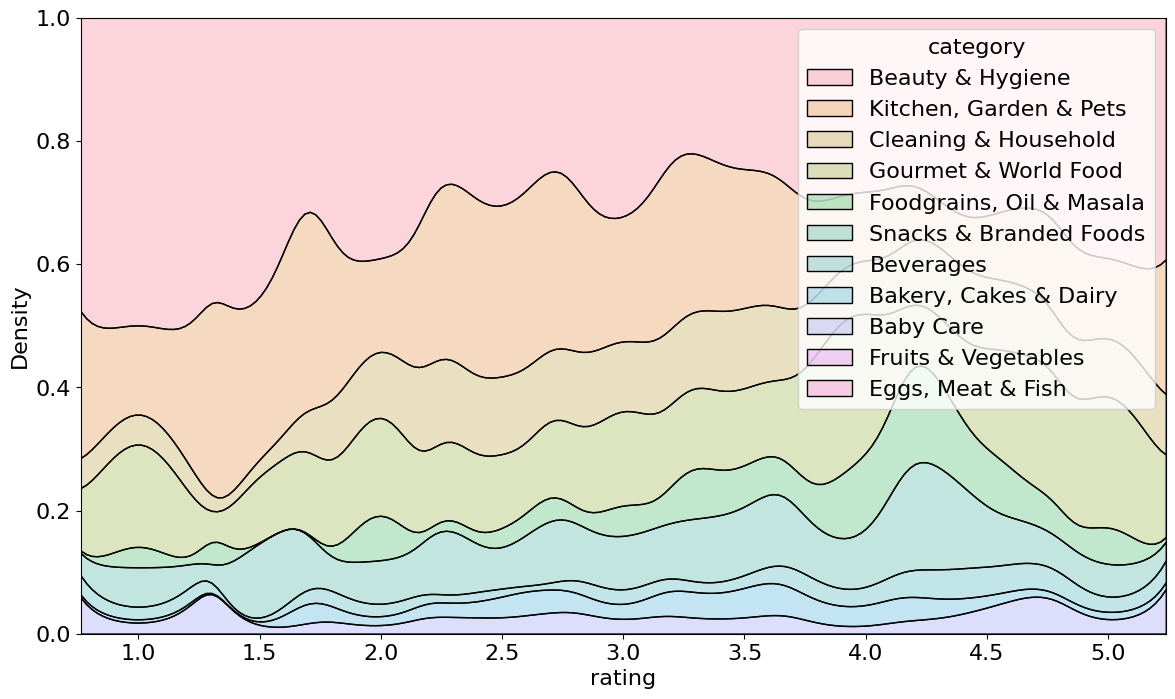

In [45]:
plt.figure(figsize=(14, 8))
sns.kdeplot(data = data1, x='rating',hue='category',multiple='fill',alpha=0.3)
plt.show()

## Content Based Recommender System

In [46]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data1['description'])
tfidf_matrix.shape

(27439, 28666)

Now to compute the similarity score, let's use Linear_Kernel.
Linear Kernel which Calculates the Dot Product of the tfidf_matrix and returns an aggreate value depicting the Similarity score.

In [47]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.01577945, 0.00997173, ..., 0.01074711, 0.01118616,
        0.        ],
       [0.01577945, 1.        , 0.00697308, ..., 0.        , 0.        ,
        0.        ],
       [0.00997173, 0.00697308, 1.        , ..., 0.0062593 , 0.        ,
        0.        ],
       ...,
       [0.01074711, 0.        , 0.0062593 , ..., 1.        , 0.        ,
        0.        ],
       [0.01118616, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

so we will be recommending items based on similarity score.
But our problem is that we will be getting back the similarity scores so we will be sorting the scores.
Now we need a reverse-map to get the title and that is what indices is for.

In [48]:
indices = pd.Series(data1.index, index=data1['product']).drop_duplicates()

def get_recommendations_1(title, cosine_sim=cosine_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data1['product'].iloc[movie_indices]

In [49]:
get_recommendations_1('Water Bottle - Orange')

11320    Rectangular Plastic Container - With Lid, Mult...
11642                               Jar - With Lid, Yellow
14551        Rectangular Container - With lid, Multicolour
26451     Round & Flat Storage Container - With lid, Green
26460             Round Plastic Container - With Lid, Pink
6163     Premium Rectangular Plastic Container With Lid...
9546     Premium Round Plastic Container With Lid - Yellow
13959    Premium Rectangular Plastic Container With Lid...
19381    Premium Round & Flat Storage Container With Li...
24255      Premium Round Plastic Container With Lid - Blue
Name: product, dtype: object

In [50]:
get_recommendations_1('Cadbury Perk - Chocolate Bar')

16586    Bb Royal Kabuli Channa 500Gm + Bb Royal Rajma ...
1656                    Organic Kabuli Chana/Kabuli Kadale
1908                    Organic Kabuli Chana/Kabuli Kadale
14831    Organic - Kabuli Chana/Channa 500gm + Organic ...
14064                Organic - Kabuli Channa/Kabuli Kadale
21091    Organic - Moong Dal 500 gm + Kabuli Chana 500 ...
4240                                  Weikfield White Oats
22896                                 Kabuli Channa Masala
7769                                  Kabuli Channa Masala
25562                   Organic Kabuli Chana/Kabuli Kadale
Name: product, dtype: object

# Data 2 : amazon-ratings

## Importing data

In [51]:
data2 = pd.read_csv('../input/amazon-ratings/ratings_Beauty.csv')

In [53]:
data2['user_id'] = pd.factorize(data2['UserId'])[0]

## To Get Famalliar With Data

In [54]:
data2

UserId   ProductId  Rating   Timestamp  user_id
0        A39HTATAQ9V7YF  0205616461     5.0  1369699200        0
1        A3JM6GV9MNOF9X  0558925278     3.0  1355443200        1
2        A1Z513UWSAAO0F  0558925278     5.0  1404691200        2
3        A1WMRR494NWEWV  0733001998     4.0  1382572800        3
4        A3IAAVS479H7M7  0737104473     1.0  1274227200        4
...                 ...         ...     ...         ...      ...
2023065  A3DEHKPFANB8VA  B00LORWRJA     5.0  1405296000  1207977
2023066  A3DEHKPFANB8VA  B00LOS7MEE     5.0  1405296000  1207977
2023067   AG9TJLJUN5OM3  B00LP2YB8E     5.0  1405382400  1210242
2023068   AYBIB14QOI9PC  B00LPVG6V0     5.0  1405555200  1209896
2023069  A1PB6OT0OOPKNQ  B00LU0LTOU     5.0  1405641600   816208

[2023070 rows x 5 columns]

In [55]:
data2.columns

Index(['UserId', 'ProductId', 'Rating', 'Timestamp', 'user_id'], dtype='object')

In [57]:
data2.describe()

Rating     Timestamp       user_id
count  2.023070e+06  2.023070e+06  2.023070e+06
mean   4.149036e+00  1.360389e+09  5.036093e+05
std    1.311505e+00  4.611860e+07  3.535750e+05
min    1.000000e+00  9.087552e+08  0.000000e+00
25%    4.000000e+00  1.350259e+09  1.895360e+05
50%    5.000000e+00  1.372810e+09  4.557920e+05
75%    5.000000e+00  1.391472e+09  7.950578e+05
max    5.000000e+00  1.406074e+09  1.210270e+06

In [60]:
print('unique users:',len(data2.UserId.unique()))
print('unique products:',len(data2.ProductId.unique()))
print("total ratings: ",data2.shape[0])

unique users: 1210271
unique products: 249274
total ratings:  2023070


### Duplicate Data

In [58]:
data2.duplicated(["UserId","ProductId", "Rating", "Timestamp"]).sum()

0

### Null Values

In [61]:
data1.isnull().sum()


index             0
product           0
category          0
sub_category      0
brand             0
sale_price        0
market_price      0
type              0
rating            0
description       0
diff_in_prices    0
discount%         0
discount          0
dtype: int64

## EDA

#### Number of rated products per user


In [68]:
products_user= data2.groupby(by = "UserId")["Rating"].count().sort_values(ascending =False)
products_user

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
                 ... 
A2G8M8PDTN09UZ      1
A2G8MAFIIQSJ42      1
A2G8MTKRE6MV52      1
A2G8MWBXG6JIY6      1
AZZZU2TD7Q3ET       1
Name: Rating, Length: 1210271, dtype: int64

#### Number of ratings per product


In [67]:
product_rated = data2.groupby(by = "ProductId")["Rating"].count().sort_values(ascending = False)
product_rated

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B004U81OBC       1
B004U7R0EI       1
B004U7Q2O2       1
B004U7NKRE       1
B00LU0LTOU       1
Name: Rating, Length: 249274, dtype: int64

#### Number of products rated by each user

In [ ]:
rated_users=df.groupby("UserId")["ProductId"].count().sort_values(ascending=False)
rated_users

In [70]:
rated_products=data2.groupby("ProductId")["UserId"].count().sort_values(ascending=False)
rated_products

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B004U81OBC       1
B004U7R0EI       1
B004U7Q2O2       1
B004U7NKRE       1
B00LU0LTOU       1
Name: UserId, Length: 249274, dtype: int64

In [73]:
index = ['Total size of records', "Number of unique users","Number of unique products"]
values =[len(data2),len(data2['UserId'].unique()),len(data2['ProductId'].unique())]

plot = go.Figure([go.Bar(x=index, y=values,textposition='auto')])
plot.update_layout(title_text='Number of Users and Products w.r.to Total size of Data',
                    xaxis_title="Records",
                    yaxis_title="Total number of Records")

plot.show()

#### The ratings given by users

In [75]:
print("Range of Ratings: ", data2['Rating'].value_counts())
print(list(data2['Rating'].value_counts()))

values = list(data2['Rating'].value_counts())

plot = go.Figure([go.Bar(x = data2['Rating'].value_counts().index, y = values,textposition='auto')])

plot.update_layout(title_text='Ratings given by user',
                    xaxis_title="Rating",
                    yaxis_title="Total number of Ratings")

plot.show()

Range of Ratings:  Rating
5.0    1248721
4.0     307740
1.0     183784
3.0     169791
2.0     113034
Name: count, dtype: int64
[1248721, 307740, 183784, 169791, 113034]


In [92]:
data2.columns

Index(['UserId', 'ProductId', 'Rating', 'Timestamp', 'user_id'], dtype='object')

In [99]:
product_ranking = data2.groupby(['ProductId'])['Rating'].mean().reset_index().sort_values(by = 'Rating', ascending=False)

fig = go.Figure(data=[go.Histogram(x=product_ranking['Rating'], nbinsx=10)])

fig.update_layout(
    title="Average Rating Distribution",
    xaxis_title="Rating",
    yaxis_title="Count",
    bargap=0.1,
    bargroupgap=0.1
)

fig.update_traces(marker_color='rgba(50, 171, 96, 0.6)')

fig.show()

#### Products which are most popular

In [77]:
print("Products with occurred the most: \n",data2['ProductId'].value_counts().nlargest(5))

values = list(data2['ProductId'].value_counts())


plot = go.Figure([go.Bar(x = data2['ProductId'].value_counts().nlargest(5).index, y = values,textposition='auto')])

plot.update_layout(title_text='Most rated products',
                    xaxis_title="ProductID",
                    yaxis_title="Number of times occurred in the data")

plot.show()

Products with occurred the most: 
 ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
Name: count, dtype: int64


#### Average rating given by each user

In [79]:
ratings_per_user = data2.groupby('UserId')['Rating'].count().sort_values(ascending=False)
print("Average rating given by each user: ",ratings_per_user.head())

plot = go.Figure(data=[go.Histogram(x=ratings_per_user)])
plot.show()


Average rating given by each user:  UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
Name: Rating, dtype: int64


In [78]:
ratings_per_product = data2.groupby('ProductId')['Rating'].count().sort_values(ascending=False)
# print("Average rating given by each user: ",ratings_per_user.head())

plot = go.Figure(data=[go.Histogram(x=ratings_per_product)])
plot.show(title_text='Number of ratings per product',
                    xaxis_title="Product",
                    yaxis_title="Number of ratings")

#### Products with very less ratings


In [80]:
rating_of_products = data2.groupby('ProductId')['Rating'].count()
# convert to make dataframe to analyse data
number_of_ratings_given = pd.DataFrame(rating_of_products)
print("Products with ratings given by users: \n",number_of_ratings_given.head())

less_than_ten = []
less_than_fifty_greater_than_ten = []
greater_than_fifty_less_than_hundred = []
greater_than_hundred = []
average_rating = []

for rating in number_of_ratings_given['Rating']:
    if rating <=10:
        less_than_ten.append(rating)
    if rating > 10 and rating <= 50:
        less_than_fifty_greater_than_ten.append(rating)
    if rating > 50 and rating <= 100:
        greater_than_fifty_less_than_hundred.append(rating)
    if rating > 100:
        greater_than_hundred.append(rating)

    average_rating.append(rating)

Products with ratings given by users: 
             Rating
ProductId         
0205616461       1
0558925278       2
0733001998       1
0737104473       1
0762451459       1


In [81]:
print("Ratings_count_less_than_ten: ", len(less_than_ten))
print("Ratings_count_greater_than_ten_less_than_fifty: ", len(less_than_fifty_greater_than_ten))
print("Ratings_count_greater_than_fifty_less_than_hundred: ", len(greater_than_fifty_less_than_hundred))
print("Ratings_count_greater_than_hundred: ", len(greater_than_hundred))
print("Average number of products rated by users: ", np.mean(average_rating))

Ratings_count_less_than_ten:  215395
Ratings_count_greater_than_ten_less_than_fifty:  27082
Ratings_count_greater_than_fifty_less_than_hundred:  4110
Ratings_count_greater_than_hundred:  2687
Average number of products rated by users:  8.115848423822781


In [82]:
x_values = ["Ratings_count_less_than_ten","Ratings_count_greater_than_ten_less_than_fifty",
           "Ratings_count_greater_than_fifty_less_than_hundred","Ratings_count_greater_than_hundred"]
y_values = [len(less_than_ten),len(less_than_fifty_greater_than_ten),len(greater_than_fifty_less_than_hundred),
            len(greater_than_hundred)]


plot = go.Figure([go.Bar(x = x_values, y = y_values, textposition='auto')])

plot.add_annotation(
        x=1,
        y=100000,
        xref="x",
        yref="y")

plot.update_layout(title_text='Ratings Count on Products',
                    xaxis_title="Ratings Range",
                    yaxis_title="Count of Rating")
plot.show()

### Scaling data

In [103]:
label_encoder = preprocessing.LabelEncoder()

## Collaborative Filtering Recommender System

In [104]:
dataset = data2
dataset['user'] = label_encoder.fit_transform(data2['UserId'])
dataset['product'] = label_encoder.fit_transform(data2['ProductId'])
dataset.head()

UserId   ProductId  Rating   Timestamp  user_id    user  product
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200        0  725046        0
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200        1  814606        1
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200        2  313101        1
3  A1WMRR494NWEWV  0733001998     4.0  1382572800        3  291075        2
4  A3IAAVS479H7M7  0737104473     1.0  1274227200        4  802842        3

In [105]:
average_rating = dataset.groupby(by="user", as_index=False)['Rating'].mean()
print("Average rating given by users: \n",average_rating.head())
print("----------------------------------------------------------\n")


# let's merge it with the dataset as we will be using that later
dataset = pd.merge(dataset, average_rating, on="user")
print("Modified dataset: \n", dataset.head())
print("----------------------------------------------------------\n")

# renaming columns
dataset = dataset.rename(columns={"Rating_x": "real_rating", "Rating_y": "average_rating"})
print("Dataset: \n", dataset.head())
print("----------------------------------------------------------\n")

Average rating given by users: 
    user  Rating
0     0     5.0
1     1     5.0
2     2     3.0
3     3     5.0
4     4     5.0
----------------------------------------------------------

Modified dataset: 
            UserId   ProductId  Rating_x   Timestamp  user_id    user  product  \
0  A39HTATAQ9V7YF  0205616461       5.0  1369699200        0  725046        0   
1  A39HTATAQ9V7YF  B002OVV7F0       3.0  1369699200        0  725046    81854   
2  A39HTATAQ9V7YF  B0031IH5FQ       5.0  1369699200        0  725046    89013   
3  A39HTATAQ9V7YF  B006GQPZ8E       4.0  1369699200        0  725046   154092   
4  A3JM6GV9MNOF9X  0558925278       3.0  1355443200        1  814606        1   

   Rating_y  
0      4.25  
1      4.25  
2      4.25  
3      4.25  
4      3.50  
----------------------------------------------------------

Dataset: 
            UserId   ProductId  real_rating   Timestamp  user_id    user  \
0  A39HTATAQ9V7YF  0205616461          5.0  1369699200        0  725046   

Certain users tend to give higher ratings while others tend to gibve lower ratings. To negate this bias, we normalise the ratings given by the users.

In [106]:
dataset['normalized_rating'] = dataset['real_rating'] - dataset['average_rating']
print("Data with adjusted rating: \n", dataset.head())

Data with adjusted rating: 
            UserId   ProductId  real_rating   Timestamp  user_id    user  \
0  A39HTATAQ9V7YF  0205616461          5.0  1369699200        0  725046   
1  A39HTATAQ9V7YF  B002OVV7F0          3.0  1369699200        0  725046   
2  A39HTATAQ9V7YF  B0031IH5FQ          5.0  1369699200        0  725046   
3  A39HTATAQ9V7YF  B006GQPZ8E          4.0  1369699200        0  725046   
4  A3JM6GV9MNOF9X  0558925278          3.0  1355443200        1  814606   

   product  average_rating  normalized_rating  
0        0            4.25               0.75  
1    81854            4.25              -1.25  
2    89013            4.25               0.75  
3   154092            4.25              -0.25  
4        1            3.50              -0.50  


### Cosine Similarity

We use a distance based metric - cosine similarity to identify similar users. It is important first, to remove products that have very low number of ratings.

In [108]:
rating_of_product = dataset.groupby('product')['real_rating'].count() # apply groupby 
ratings_of_products_df = pd.DataFrame(rating_of_product)
print("Real ratings:\n",ratings_of_products_df.head()) # check for real rating for products


filtered_ratings_per_product = ratings_of_products_df[ratings_of_products_df.real_rating >= 200]
print(filtered_ratings_per_product.head())
print(filtered_ratings_per_product.shape)

Real ratings:
          real_rating
product             
0                  1
1                  2
2                  1
3                  1
4                  1
         real_rating
product             
704              558
719              377
754              288
834              412
843              313
(934, 1)


In [109]:
popular_products = filtered_ratings_per_product.index.tolist()
print("Popular product count which have ratings over average rating count: ",len(popular_products))
print("--------------------------------------------------------------------------------")

filtered_ratings_data = dataset[dataset["product"].isin(popular_products)]
print("Filtered rated product in the dataset: \n",filtered_ratings_data.head())
print("---------------------------------------------------------------------------------")

print("The size of dataset has changed from ", len(dataset), " to ", len(filtered_ratings_data))
print("---------------------------------------------------------------------------------")

Popular product count which have ratings over average rating count:  934
--------------------------------------------------------------------------------
Filtered rated product in the dataset: 
             UserId   ProductId  real_rating   Timestamp  user_id     user  \
1   A39HTATAQ9V7YF  B002OVV7F0          3.0  1369699200        0   725046   
18   AKJHHD5VEH7VG  B0000UTUVU          5.0  1232323200        5  1073169   
20   AKJHHD5VEH7VG  B000F8HWXU          5.0  1379721600        5  1073169   
45   AKJHHD5VEH7VG  B001LF4I8I          4.0  1232841600        5  1073169   
47   AKJHHD5VEH7VG  B001OMI93S          5.0  1236643200        5  1073169   

    product  average_rating  normalized_rating  
1     81854        4.250000          -1.250000  
18     2237        4.222222           0.777778  
20    16510        4.222222           0.777778  
45    65074        4.222222          -0.222222  
47    67333        4.222222           0.777778  
------------------------------------------------

#### Creating the User-item matrix


In [116]:
similarity = pd.pivot_table(filtered_ratings_data,values='normalized_rating',index='UserId',columns='product')
similarity = similarity.fillna(0)
print("Updated Dataset: \n",similarity.head())

Updated Dataset: 
 product                704     719     754     834     843     858     861     \
UserId                                                                          
A0010876CNE3ILIM9HV0      0.0     0.0     0.0     0.0     0.0     0.0     0.0   
A0011102257KBXODKL24I     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
A00120381FL204MYH7G3B     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
A00126503SUWI86KZBMIN     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
A001573229XK5T8PI0OKA     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

product                873     944     981     ...  241604  242018  242048  \
UserId                                         ...                           
A0010876CNE3ILIM9HV0      0.0     0.0     0.0  ...     0.0     0.0     0.0   
A0011102257KBXODKL24I     0.0     0.0     0.0  ...     0.0     0.0     0.0   
A00120381FL204MYH7G3B     0.0     0.0     0.0  ...     0.0     0.0     0.0   
A00126503SUWI86KZBMIN  

As you can see, this is a very sparse matrix

In [117]:
selecting_users = list(similarity.index)
selecting_users = selecting_users[:100]
print("You can select users from the below list:\n",selecting_users)

You can select users from the below list:
 ['A0010876CNE3ILIM9HV0', 'A0011102257KBXODKL24I', 'A00120381FL204MYH7G3B', 'A00126503SUWI86KZBMIN', 'A001573229XK5T8PI0OKA', 'A00203203EBR4E6BIUOKF', 'A00222842T0ZYI86C9LHU', 'A00258542AL4VKETFLGIJ', 'A00259242VSCRZPGIWP0M', 'A00262022JQPXX5SXEVJR', 'A00275441WYR3489IKNAB', 'A00328401T70RFN4P1IT6', 'A00349462AOAVUUPEJNQZ', 'A00370223FX3K9TUF1QCL', 'A00407141VL6SB77B1GGG', 'A00414041RD0BXM6WK0GX', 'A00426443G4MEWS3K1XFA', 'A004511036AHSSV5O4SBY', 'A00454102SR84NOYTI0JS', 'A00463203QYS5I5X6MMXW', 'A00473363TJ8YSZ3YAGG9', 'A00491723IYKW5UI74AEX', 'A0058336347PC7BSR0UJC', 'A00612582Z6ZU2SDMRQ07', 'A00615442TZG6MHZXJOIZ', 'A00627983P6OGUFJ3IW8H', 'A006502622TE53S3J9W6H', 'A00656692CXO0VGF00V9I', 'A006680338J29DP17XALU', 'A00669491O55AKJ5QVH9L', 'A00679332RYOO5406ARSG', 'A00700212KB3K0MVESPIY', 'A0072717335KA6520NEMI', 'A0074075A8TZJIPLGZEK', 'A00773851NXKGCZRY43PG', 'A0078719IR14X3NNUG0F', 'A00802872RVW2KLY6DAL0', 'A008374338GH2TUB0S8KP', 'A0085249

In [118]:
def getting_top_5_similar_users(user_id, similarity_table, k=5):
    '''

    :param user_id: the user we want to recommend
    :param similarity_table: the user-item matrix
    :return: Similar users to the user_id.
    '''

    # create a dataframe of just the current user
    user = similarity_table[similarity_table.index == user_id]
    # and a dataframe of all other users
    other_users = similarity_table[similarity_table.index != user_id]
    # calculate cosine similarity between user and each other user
    similarities = cosine_similarity(user, other_users)[0].tolist()

    indices = other_users.index.tolist()
    index_similarity = dict(zip(indices, similarities))

    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()

    # take users
    top_users_similarities = index_similarity_sorted[:k]
    users = []
    for user in top_users_similarities:
        users.append(user[0])

    return users

In [119]:
user_id = "A0010876CNE3ILIM9HV0"
similar_users = getting_top_5_similar_users(user_id, similarity)
print("Top 5 similar users for user_id:",user_id," are: ",similar_users)

Top 5 similar users for user_id: A0010876CNE3ILIM9HV0  are:  ['AXNF1BLDR4P47', 'ARTHT19OB79VZ', 'ARQ9I3Y0VPB6N', 'AOXEXSN7M9ENJ', 'AN0AO97264HP4']


### Recommend products based on these top similar users

In [120]:
def getting_top_5_recommendations_based_on_users(user_id, similar_users, similarity_table, top_recommendations=5):
    '''

    :param user_id: user for whom we want to recommend
    :param similar_users: top 5 similar users
    :param similarity_table: the user-item matrix
    :param top_recommendations: no. of recommendations
    :return: top_5_recommendations
    '''

    # taking the data for similar users
    similar_user_products = dataset[dataset.UserId.isin(similar_users)]
#     print("Products used by other users: \n", similar_user_products.head())
#     print("---------------------------------------------------------------------------------")

    # getting all similar users
    similar_users = similarity_table[similarity_table.index.isin(similar_users)]

    #getting mean ratings given by users
    similar_users = similar_users.mean(axis=0)


    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])
    # for the current user data
    user_df = similarity_table[similarity_table.index == user_id]


    # transpose it so its easier to filter
    user_df_transposed = user_df.transpose()


    # rename the column as 'rating'
    user_df_transposed.columns = ['rating']

    # rows with a 0 value.
    user_df_transposed = user_df_transposed[user_df_transposed['rating'] == 0]


    # generate a list of products the user has not used
    products_not_rated = user_df_transposed.index.tolist()
#     print("Products not used by target user: ", products_not_rated)
#     print("-------------------------------------------------------------------")

    # filter avg ratings of similar users for only products the current user has not rated
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(products_not_rated)]
    # order the dataframe
    similar_users_df_ordered = similar_users_df_filtered.sort_values(by=['mean'], ascending=False)



    # take the top products
    top_products = similar_users_df_ordered.head(top_recommendations)
    top_products_indices = top_products.index.tolist()


    return top_products_indices

In [121]:
print("Top 5 productID recommended are: ",
      getting_top_5_recommendations_based_on_users(user_id, similar_users, similarity))
filtered_ratings_data.shape
filtered_ratings_data.head()
filtered_ratings_data[filtered_ratings_data['UserId']=="A0010876CNE3ILIM9HV0"]

Top 5 productID recommended are:  [704, 122630, 119407, 119506, 119742]


UserId   ProductId  real_rating   Timestamp  user_id  \
1160176  A0010876CNE3ILIM9HV0  B0055MYJ0U          1.0  1390521600   547427   

         user  product  average_rating  normalized_rating  
1160176    11   136012             2.5               -1.5

In [123]:
from sklearn.model_selection import train_test_split


In [134]:
train_data, test_data = train_test_split(filtered_ratings_data,test_size=0.2)

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)
similarity = pd.pivot_table(train_data,values='normalized_rating',index='UserId',columns='product')
similarity = similarity.fillna(0)
print("Updated Dataset: \n",similarity.head())



Updated Dataset: 
 product                704     719     754     834     843     858     861     \
UserId                                                                          
A0011102257KBXODKL24I     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
A00120381FL204MYH7G3B     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
A001573229XK5T8PI0OKA     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
A00203203EBR4E6BIUOKF     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
A00258542AL4VKETFLGIJ     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

product                873     944     981     ...  241604  242018  242048  \
UserId                                         ...                           
A0011102257KBXODKL24I     0.0     0.0     0.0  ...     0.0     0.0     0.0   
A00120381FL204MYH7G3B     0.0     0.0     0.0  ...     0.0     0.0     0.0   
A001573229XK5T8PI0OKA     0.0     0.0     0.0  ...     0.0     0.0     0.0   
A00203203EBR4E6BIUOKF  

In [135]:
similarity.shape

(251624, 934)

In [136]:
selecting_users = list(similarity.index)
selecting_users = selecting_users[:100]
print("You can select users from the below list:\n",selecting_users)

You can select users from the below list:
 ['A0011102257KBXODKL24I', 'A00120381FL204MYH7G3B', 'A001573229XK5T8PI0OKA', 'A00203203EBR4E6BIUOKF', 'A00258542AL4VKETFLGIJ', 'A00259242VSCRZPGIWP0M', 'A00275441WYR3489IKNAB', 'A00370223FX3K9TUF1QCL', 'A00407141VL6SB77B1GGG', 'A00414041RD0BXM6WK0GX', 'A00426443G4MEWS3K1XFA', 'A004511036AHSSV5O4SBY', 'A00454102SR84NOYTI0JS', 'A00463203QYS5I5X6MMXW', 'A00473363TJ8YSZ3YAGG9', 'A0058336347PC7BSR0UJC', 'A00612582Z6ZU2SDMRQ07', 'A00615442TZG6MHZXJOIZ', 'A00627983P6OGUFJ3IW8H', 'A006502622TE53S3J9W6H', 'A006680338J29DP17XALU', 'A00669491O55AKJ5QVH9L', 'A00700212KB3K0MVESPIY', 'A0072717335KA6520NEMI', 'A0074075A8TZJIPLGZEK', 'A00773851NXKGCZRY43PG', 'A0078719IR14X3NNUG0F', 'A00802872RVW2KLY6DAL0', 'A008374338GH2TUB0S8KP', 'A00852491YPMY2HLYZ52N', 'A0086401DFJEZA4RT4OL', 'A00995931BE16NG4F52QC', 'A01026292DKV5RYUH42C9', 'A01032093UTJ2SF3EQFS1', 'A010356935P3D9IEDEUIN', 'A010407538LRAQYK3G2RZ', 'A0116899HIQEDWSBJJG9', 'A01184631PAAXN2HOZGBY', 'A01198201

In [137]:
user_id = "A02720223TDVZSWVZYFN7"
similar_users = getting_top_5_similar_users(user_id, similarity)

print("Top 5 similar users for user_id:",user_id," are: ",similar_users)
print("Top 5 productID recommended are: ",
      getting_top_5_recommendations_based_on_users(user_id, similar_users, similarity))

Top 5 similar users for user_id: A02720223TDVZSWVZYFN7  are:  ['AZZZLM1E5JJ8C', 'AZZZKHVV482YT', 'AZZYW4YOE1B6E', 'AZZWMH759YWOO', 'AZZWJ3LICUEKJ']
Top 5 productID recommended are:  [30773, 27327, 704, 119742, 120416]


In [138]:
test_data.shape


(74103, 9)

In [139]:
len(test_data.user.unique())


70052

In [140]:
test_data.UserId


311088     A3C2N1B02WVM7J
31681      A212TAKYCVZQTK
1087581     AKP6IWJ24C1A5
1176137    A2TILC6E3LKFNJ
1617973    A216B55CB3OMBF
                ...      
339306     A1EHL2DY48HIAK
120245      ABY77ZEHN9WLU
522392     A3NCDJCV06OLT4
1656703    A2MJOVIO1SH6WC
862203     A36ERZW7TUXQVQ
Name: UserId, Length: 74103, dtype: object

In [141]:
test_data.head()

UserId   ProductId  real_rating   Timestamp  user_id  \
311088   A3C2N1B02WVM7J  B005XIDZHO          5.0  1371859200    99920   
31681    A212TAKYCVZQTK  B000052YM7          5.0  1388707200     7446   
1087581   AKP6IWJ24C1A5  B001DYM62C          5.0  1405209600   501485   
1176137  A2TILC6E3LKFNJ  B001MA0QY2          1.0  1382400000   558591   
1617973  A216B55CB3OMBF  B004TSFBNK          5.0  1348704000   871947   

            user  product  average_rating  normalized_rating  
311088    747982   149249             5.0                0.0  
31681     330240      834             5.0                0.0  
1087581  1074633    56776             5.0                0.0  
1176137   582982    65766             1.0                0.0  
1617973   331102   128160             4.5                0.5

In [142]:
def recommend_products_for_user(userId, similarity_matrix):
    similar_users = getting_top_5_similar_users(user_id, similarity_matrix)
#     print("Top 5 similar users for user_id:",user_id," are: ",similar_users)
    product_list = getting_top_5_recommendations_based_on_users(user_id, similar_users, similarity)
#     print("Top 5 productID recommended are: ", product_list)
    return product_list

In [143]:
recommend_products_for_user("A2XVNI270N97GL", similarity)

[30773, 27327, 704, 119742, 120416]